# Методы метрической классификации
### Цель работы:
Познакомиться с основными методами метрической классификации, их реализацией и приемами работы в scikit-learn.

## Задания для выполнения
1) Загрузите данные о диагностике сахарного диабета;

2) Разделите эти данные на тестовую и обучающую выборки;

3) Постройте модель классификации для определения заболевания;

4) Оцените качество модели на тестовой выборке с помощью следующих метрик:

    - достоверность предсказания (accuracy);
    - точность (precision);
    - полнота (recall);
    
5) Сделайте вывод о применимости модели.

#### Загрузим необходимые библиотеки

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
# from cf_matrix import make_confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение/data/diabetes.csv', header = None, names = col_names)
pima = pima[1:]

In [6]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных - удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. Используемый нами набор - сам по себе довольно чистый, потому в учебных целях пропустим этот шаг.

Выделим целевую переменную и факторы:

In [7]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Разделим набор данных на обучающую и тестовую выборки:

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = True)

В данном случае мы используем удобную встроенную функцию sklearn для разбиения выборки. Мы используем соотношение 80/20 для обучающей и тестовой выборки. Соотношение может колебаться и зависит от множества факторов, но 80/20 - хорошее значение по умолчанию.

## Логическая регрессия

Построим модель логистической регрессии:

In [9]:
cls = LogisticRegression()

Обучим наш классификатор на обучающей выборке

In [10]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Сделаем предсказания по нашему классификатору на тестовой выборке для оценки эффективности полученной модели

In [11]:
y_pred = cls.predict(x_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

In [12]:
my_matrix = metrics.confusion_matrix(y_test, y_pred)
my_matrix

array([[89, 10],
       [24, 31]])

А это то же самое, но только в красивом виде

In [ ]:
# make_confusion_matrix(my_matrix, figsize=(6,5), cbar=True)
# plt.savefig("./matrix.png",bbox_inches='tight')

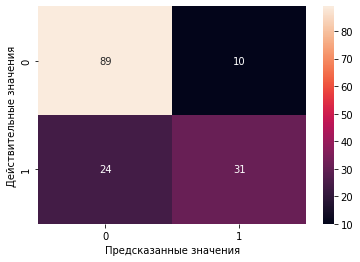

In [13]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

#### Что это означает?
89 - это кол-во тех людей, у которых нет диабета и модель предсказала это верно

31 - это кол-во тех людей, у которых есть диабет и модель предсказала это верно

24 - это кол-во тех людей, у которых в действительности есть диабет, но модель предсказала, что его нет (плохо)

10 - это кол-во людей, у которых нет диабета, но модель предсказала, что он есть (плохо, но не очень)

#### Как это называется
89 - true negative, классификатор верно утверждает, что объект не принадлежит к рассматриваемому классу.

24 - false negative, классификатор неверно утверждает, что объект не принадлежит к рассматриваемому классу.

31 - true positive, классификатор верно отнёс объект к рассматриваемому классу.

10 - false positive, классификатор неверно отнёс объект к рассматриваемому классу.

### Метрика достоверности предсказания:

In [14]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

### Метрика точности:

In [15]:
metrics.precision_score(y_test, y_pred, pos_label="1") # 

0.7560975609756098

### Метрика полноты:

In [16]:
metrics.recall_score(y_test, y_pred, pos_label="1") # выявление болезни (даже если человек не болеет то можно перепроверить его болезнь)

0.5636363636363636

## Метод опорных векторов

In [17]:
clf = svm.SVC()

In [18]:
clf.fit(x_train, y_train)

SVC()

In [19]:
y_vect_pred = clf.predict(x_test)
# y_v_pred

In [20]:
my_matrix_vect = metrics.confusion_matrix(y_test, y_vect_pred)
my_matrix_vect

array([[93,  6],
       [27, 28]])

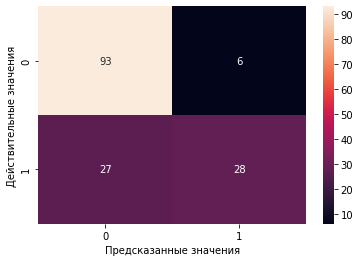

In [21]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_vect_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [22]:
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_vect_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_vect_pred, pos_label="1"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_vect_pred, pos_label="1"))
print("f1 score: ", metrics.f1_score(y_test, y_vect_pred, pos_label="1"))

Метрика достоверности предсказания:  0.7857142857142857
Метрика точности:  0.8235294117647058
Метрика полноты:  0.509090909090909
f1 score:  0.6292134831460674


## Метод опорных векторов с линейным ядром (SVC)

In [23]:
linear_svc = svm.SVC(kernel='linear')

In [24]:
linear_svc.fit(x_train, y_train)

SVC(kernel='linear')

In [25]:
y_vect_linear_pred = linear_svc.predict(x_test)

In [26]:
my_matrix_vect_linear = metrics.confusion_matrix(y_test, y_vect_linear_pred)
my_matrix_vect_linear

array([[89, 10],
       [24, 31]])

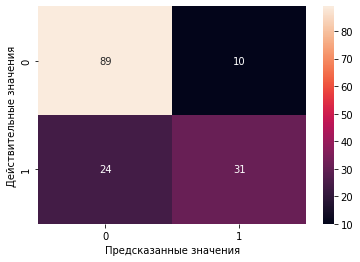

In [27]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_vect_linear_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [28]:
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_vect_linear_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_vect_linear_pred, pos_label="1"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_vect_linear_pred, pos_label="1"))
print("f1 score: ", metrics.f1_score(y_test, y_vect_linear_pred, pos_label="1"))

Метрика достоверности предсказания:  0.7792207792207793
Метрика точности:  0.7560975609756098
Метрика полноты:  0.5636363636363636
f1 score:  0.6458333333333333


## Метод опорных векторов с гауссовым ядром (SVC)

In [29]:
rbf_svc = svm.SVC(kernel='rbf')

In [30]:
rbf_svc.fit(x_train, y_train)

SVC()

In [31]:
y_vect_gaussian_pred = rbf_svc.predict(x_test)

In [32]:
my_matrix_vect_gaussian = metrics.confusion_matrix(y_test, y_vect_gaussian_pred)
my_matrix_vect_gaussian

array([[93,  6],
       [27, 28]])

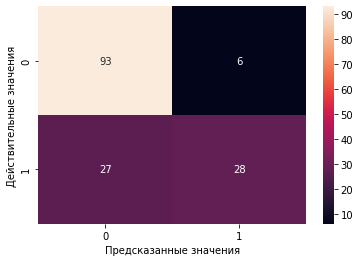

In [33]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_vect_gaussian_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [34]:
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_vect_gaussian_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_vect_gaussian_pred, pos_label="1"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_vect_gaussian_pred, pos_label="1"))
print("f1 score: ", metrics.f1_score(y_test, y_vect_gaussian_pred, pos_label="1"))

Метрика достоверности предсказания:  0.7857142857142857
Метрика точности:  0.8235294117647058
Метрика полноты:  0.509090909090909
f1 score:  0.6292134831460674


## Метод k ближайших соседей (KNeighborsClassifier)

In [35]:
neigh = KNeighborsClassifier()

In [36]:
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
y_neigh_pred = neigh.predict(x_test)

In [38]:
my_matrix_neigh = metrics.confusion_matrix(y_test, y_neigh_pred)
my_matrix_neigh

array([[82, 17],
       [24, 31]])

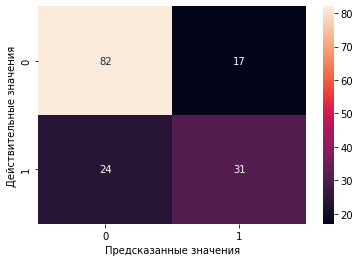

In [39]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_neigh_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [40]:
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_vect_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_vect_pred, pos_label="1"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_vect_pred, pos_label="1"))
print("f1 score: ", metrics.f1_score(y_test, y_vect_pred, pos_label="1"))

Метрика достоверности предсказания:  0.7857142857142857
Метрика точности:  0.8235294117647058
Метрика полноты:  0.509090909090909
f1 score:  0.6292134831460674


## Многослойный перцептрон (MLP)

In [41]:
clf_mlp = MLPClassifier()

In [42]:
clf_mlp.fit(x_train, y_train)

MLPClassifier()

In [43]:
y_mlp_pred = clf_mlp.predict(x_test)

In [44]:
my_matrix_mlp = metrics.confusion_matrix(y_test, y_mlp_pred)
my_matrix_mlp

array([[69, 30],
       [24, 31]])

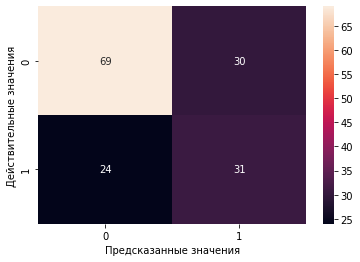

In [45]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_mlp_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [46]:
print("Метрика достоверности предсказания: ", metrics.accuracy_score(y_test, y_mlp_pred))
print("Метрика точности: ", metrics.precision_score(y_test, y_mlp_pred, pos_label="1"))
print("Метрика полноты: ", metrics.recall_score(y_test, y_mlp_pred, pos_label="1"))
print("f1 score: ", metrics.f1_score(y_test, y_mlp_pred, pos_label="1"))

Метрика достоверности предсказания:  0.6493506493506493
Метрика точности:  0.5081967213114754
Метрика полноты:  0.5636363636363636
f1 score:  0.5344827586206896


#### *Используемые в примере метрики отражают следующее:*

- accuracy — показывает долю правильных ответов модели. Ее значение равно отношению числа правильных ответов, которые дала модель, к числу всех объектов. Но она не полностью отражает качество модели. Поэтому вводятся precision и recall.

- precision (точность) — эта метрика показывает, насколько мы можем доверять модели, другими словами, какое у нас количество «ложных срабатываний». Значение метрики равно отношению числа ответов, которые модель считает правильными, и они действительно были правильными (это число обозначается «true positives») к сумме «true positives» и числа объектов которые модель посчитала правильными, а на самом деле они были неправильные(это число обозначается «false positives»). В виде формулы: precision = «true positives» / («true positives» + «false positives»)

- recall (полнота) — эта метрика показывает насколько модель может вообще обнаруживать правильные ответы, другими словами, какое у нас количество «ложных пропусков». Ее численное значение равно отношению ответов, которые модель считает правильными, и они действительно были правильными к числу всех правильных ответов в выборке. В виде формулы: recall = «true positives» / «all positives»

- f1-score (f-мера) — это объединение precision и recall

- support — просто число найденных объектов в классе

#### *Сравнение методов*

- главное отличие между линейной регрессией и логистической регрессией является то, что линейная регрессия используется для прогнозирования непрерывного значения, в то время как логистическая регрессия используется для прогнозирования дискретного значения.

- отличаются функцией потерь -SVM сводит к минимуму потери шарниров, а логистическая регрессия сводит к минимуму логистические потери. SVM пытается максимизировать разницу между ближайшими векторами поддержки, а LR - вероятностью апостериорного класса. Таким образом, SVM находит решение, которое является максимально возможным для обеих категорий, в то время как LR не обладает этим свойством. LR более чувствителен к выбросам, чем SVM, потому что функция стоимости LR расходится быстрее, чем функция SVM. Таким образом, выделение на изображении выше даст картину ниже:

- В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны.

## Загрузим датасет Iris для дальнейшего анализа

Импортируем необходимые библиотеки

In [47]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

In [48]:
iris = load_iris()
# iris

In [49]:
print (iris.feature_names)
print (iris.data[:10])
print (iris.target_names)
print (iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [50]:
iris_ = pd.DataFrame(iris.data)
iris_.columns = iris.feature_names
iris_['target'] = iris.target
iris_['class'] = iris_.target.apply(lambda x : iris.target_names[x])
iris_

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


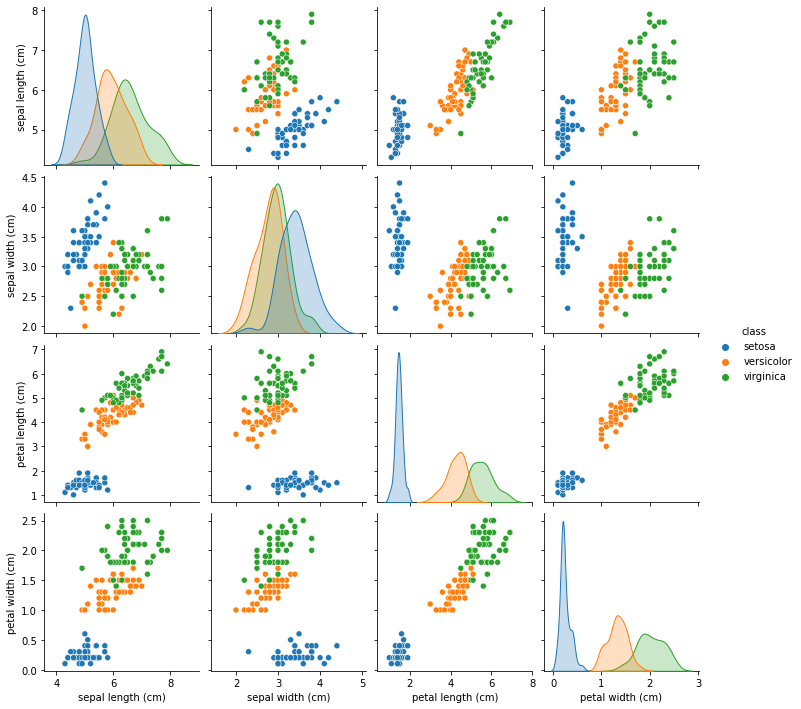

In [51]:
sns.pairplot(iris_[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "class"]], hue="class")

Мы можем наблюдать, что есть линейность между аттрибутами 'petal length (cm)' и 'petal width (cm)'

Взглянем на корреляцию между всеми атрибутами с целью отбора тех которые имеют наибольшую корреляцию

In [52]:
iris_.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Действительно 'petal length (cm)' и 'petal width (cm)' имеют самую большую корреляцию = 0.962865	

In [53]:
Y = iris_.target
X = iris_.drop(['target' , 'class'], axis=1)

In [54]:
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(X, Y, test_size = 0.2, random_state = True)

In [55]:
cls_iris = LogisticRegression()

In [56]:
cls_iris.fit(x_iris_train, y_iris_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
y_pred_iris = cls_iris.predict(x_iris_test)

In [58]:
my_matrix_iris = metrics.confusion_matrix(y_iris_test, y_pred_iris)
my_matrix_iris

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

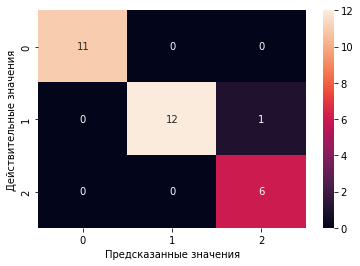

In [59]:
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_iris_test, y_pred_iris)), annot = True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()